# References

- https://github.com/ChawlaAvi/Daily-Dose-of-Data-Science/tree/main/Plotting

# Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# number formatting
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# max rows and columns to show
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Import Dataset

In [3]:
# from Github
df = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com//gsrubio/portfolio/main/datasets/supermarket_sales.csv', # replace github.com for raw.githubusercontent.com/ and remove the 'blob'
    sep=',',
    decimal='.',
    parse_dates=[10], # date column
    )

In [4]:
df = (df
      .assign(
          year = df['Date'].dt.year
          ,month = df['Date'].dt.month
          ,week = df['Date'].dt.isocalendar().week
          ,month_year = df['Date']
                        .dt.to_period('M') # truncate month-year
                        .dt.to_timestamp()
          ,week_year = df['Date']
                .dt.to_period('W') # truncate week-year
                .dt.to_timestamp()
      )
)

In [37]:
df.nunique()

,0
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990
Total,990


In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,month_year,week_year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10,2019,1,1,2019-01-01,2018-12-31
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60,2019,3,10,2019-03-01,2019-03-04
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40,2019,3,9,2019-03-01,2019-02-25
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40,2019,1,4,2019-01-01,2019-01-21
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30,2019,2,6,2019-02-01,2019-02-04


# Plotly Express

## Single Line Plot

In [6]:
fig = px.line(
df.groupby('Date',as_index=False, dropna=False).agg({'Total':'mean'})
,y='Total'
,x='Date'
,template='plotly_white'
,markers=True
)

# Figure Styling
fig.update_layout(
    # Plot Title
    title = 'Total per date'
    #,title = "Virginica is the plant with longest sepal length <br><sup>Sepal Lenght by Plant Species</sup>" # explanatory title + descriptive subtitle option
    ,title_font = dict (color = '#545353', size = 20, family = 'sans-serif')
    ,title_xanchor='left'
    ,title_x = 0.015
    ,title_y = 0.96
)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [22]:
def line_chart(df, x_axis, y_axis, agg_function, title=None, x_label=None, y_label=None, legend_title=None, height=600, width=1200):
    color_palette_cud = [
        '#E69F00', '#56B4E9', '#009E73', '#F0E442',
        '#0072B2', '#D55E00', '#CC79A7', '#999999']

    # create chart
    fig = px.line(
        df.groupby([x_axis], as_index=False, dropna=False).agg({y_axis: agg_function}),
        y=y_axis,
        x=x_axis,
        color_discrete_sequence=color_palette_cud,
        template='plotly_white',
        markers=True
    )

    # Figure Styling
    fig.update_layout(
        # Plot Title
        title= title if title else (y_axis + ' per ' + x_axis),
        title_font=dict(color='#545353', size=22, family='sans-serif'),
        title_xanchor='left',
        title_x=0.015,
        title_y=0.96,
        xaxis_title= x_label if x_label else x_axis,
        yaxis_title= y_label if y_label else y_axis,
        height=height,  # Set the plot height
        width=width,  # Set the plot width
    )

    return fig.show()

In [23]:
line_chart(df=df, x_axis='Date', y_axis='Total', agg_function='sum')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Line chart with segmentation

In [19]:
color_palette_cud = [
'#E69F00', '#56B4E9', '#009E73', '#F0E442',
'#0072B2', '#D55E00', '#CC79A7', '#999999']

fig = px.line(
df.groupby(['Date', 'Customer type'],as_index=False, dropna=False).agg({'Total':'mean'})
,y='Total'
,x='Date'
,color='Customer type'
,template='plotly_white'
,markers=True
)

# Figure Styling
fig.update_layout(
    # Plot Title
    title = 'Total per date'
    #,title = "Virginica is the plant with longest sepal length <br><sup>Sepal Lenght by Plant Species</sup>" # explanatory title + descriptive subtitle option
    ,title_font = dict (color = '#545353', size = 22, family = 'sans-serif')
    ,title_xanchor='left'
    ,title_x = 0.015
    ,title_y = 0.96
    #,xaxis_title=
    #,yaxis_title=
    #,legend_title=
    ,height=600  # Set the plot height
    ,width=1400 # Set the plot width
)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [64]:
def multiple_line_chart(df, x_axis, y_axis, agg_function, segment, title=None, x_label=None, y_label=None, legend_title=None, height=600, width=1200, title_margin=0.07):
    color_palette_cud = [
        '#E69F00', '#56B4E9', '#009E73', '#F0E442',
        '#0072B2', '#D55E00', '#CC79A7', '#999999']

    # create chart
    fig = px.line(
        df.groupby([x_axis, segment], as_index=False, dropna=False).agg({y_axis: agg_function}),
        y=y_axis,
        x=x_axis,
        color=segment,
        color_discrete_sequence=color_palette_cud,
        template='plotly_white',
        markers=True
    )

    # Figure Styling
    fig.update_layout(
        # Plot Title
        title= title if title else (y_axis + ' per ' + x_axis),
        title_font=dict(color='#545353', size=22, family='sans-serif'),
        title_xanchor='left',
        title_x=0.015,
        title_y=0.96,  # Adjust the title position
        margin=dict(t=80 + title_margin * 100, b=50, l=50, r=50),  # Adjust margins: top margin includes space for title
        xaxis_title= x_label if x_label else x_axis,
        yaxis_title= y_label if y_label else y_axis,
        legend_title= legend_title if legend_title else segment,
        height=height,  # Set the plot height
        width=width,  # Set the plot width
    )

    return fig.show()

In [65]:
multiple_line_chart(df=df,x_axis='Date', y_axis='Total', agg_function='sum', segment='Customer type', width=1400, title='Total Revenue per Day (2019)')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Facet Row/Column

In [68]:
def multiple_line_chart_facet(df, x_axis, y_axis, agg_function, segment, facet_c=None, facet_r=None, title=None, x_label=None, y_label=None, legend_title=None, height=600, width=1200, title_margin=0.1):
    color_palette_cud = [
        '#E69F00', '#56B4E9', '#009E73', '#F0E442',
        '#0072B2', '#D55E00', '#CC79A7', '#999999']

    # Determine the groupby columns based on the provided facets
    groupby_cols = [x_axis, segment]
    if facet_c:
        groupby_cols.append(facet_c)
    if facet_r:
        groupby_cols.append(facet_r)

    # Create chart
    fig = px.line(
        df.groupby(groupby_cols, as_index=False, dropna=False).agg({y_axis: agg_function}),
        y=y_axis,
        x=x_axis,
        color=segment,
        facet_col=facet_c,
        facet_row=facet_r,
        color_discrete_sequence=color_palette_cud,
        template='plotly_white',
        markers=True
    )

    # Figure Styling
    fig.update_layout(
        # Plot Title
        title= title if title else (y_axis + ' per ' + x_axis),
        title_font=dict(color='#545353', size=22, family='sans-serif'),
        title_xanchor='left',
        title_x=0.015,
        title_y=0.96,  # Adjust the title position
        margin=dict(t=80 + title_margin * 100, b=50, l=50, r=50),  # Adjust margins: top margin includes space for title
        xaxis_title= x_label if x_label else x_axis,
        yaxis_title= y_label if y_label else y_axis,
        legend_title= legend_title if legend_title else segment,
        height=height,  # Set the plot height
        width=width,  # Set the plot width
    )

    return fig.show()


In [69]:
multiple_line_chart_facet(df=df,x_axis='Date', y_axis='Total', agg_function='sum', segment='Customer type', height=800, width=1400, title='Total Revenue per Day (2019)', facet_c='Gender', facet_r='City')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Combine chart (Column + line)

In [40]:
# Group the data and calculate metrics
df_grouped = (df
          .groupby('Product line', as_index=False, dropna=False)
          .agg(
              revenue=('Total', 'sum')
          )
          .sort_values(by='revenue', ascending=False)
          .assign(
              **{
                '% revenue': lambda x: x['revenue'] / x['revenue'].sum(),
                'cummulative % revenue': lambda x: x['revenue'].cumsum() / x['revenue'].sum()
                }
          )
)

df_grouped

,Product line,revenue,% revenue,cummulative % revenue
2,Food and beverages,"56,144.84",0.17,0.17
5,Sports and travel,"55,122.83",0.17,0.34
0,Electronic accessories,"54,337.53",0.17,0.51
1,Fashion accessories,"54,305.89",0.17,0.68
4,Home and lifestyle,"53,861.91",0.17,0.85
3,Health and beauty,"49,193.74",0.15,1.00


In [41]:
# Create the bar plot
fig = px.bar(df_grouped, x='Product line', y='revenue',
             title='Revenue per Product Line',
             #labels={'Product line': 'Product Line', 'revenue': 'Total Revenue'},
             #category_orders=,
             template='plotly_white')

fig.add_scatter(x=df_grouped['Product line'], y=df_grouped['cummulative % revenue'], mode='lines+markers+text', name='Cumulative Percentage',
                yaxis='y2', text=df_grouped['cummulative % revenue'], showlegend=False, texttemplate='%{text:.1%}', textposition='top center')

# Update layout to add dual y-axis
fig.update_layout(yaxis=dict(title='Total Revenue', showgrid=False, range=[0, 60000]),
                  yaxis2=dict(title='% Cumulative Revenue', overlaying='y', side='right', showgrid=False,range=[0, 1.1], tickformat='.0%'))

# Set the width and height of the figure
fig.update_layout(width=1200, height=400)

# Show the plot
fig.show()


## Add Anotations

In [42]:
# Create the bar plot
fig = px.line(
        df.groupby('week',as_index=False, dropna=False).agg({'Total':'sum'})
        ,y='Total'
        ,x='week'
        ,template='plotly_white'
        ,markers=True
        )

# update axis
fig.update_layout(yaxis=dict(title='Total Revenue', showgrid=True, range=[10000, 40000]))

# Add a horizontal line at y = 1
fig.add_vline(x=3, line_color="dark grey", line_width=1,annotation_text="vertical line = 3",row=0)
fig.add_hline(y=20000, line_dash="dash", line_color="red", line_width=1, annotation_text="horizontal line = 20k")


fig.show()

# Seaborn

## Bar plot

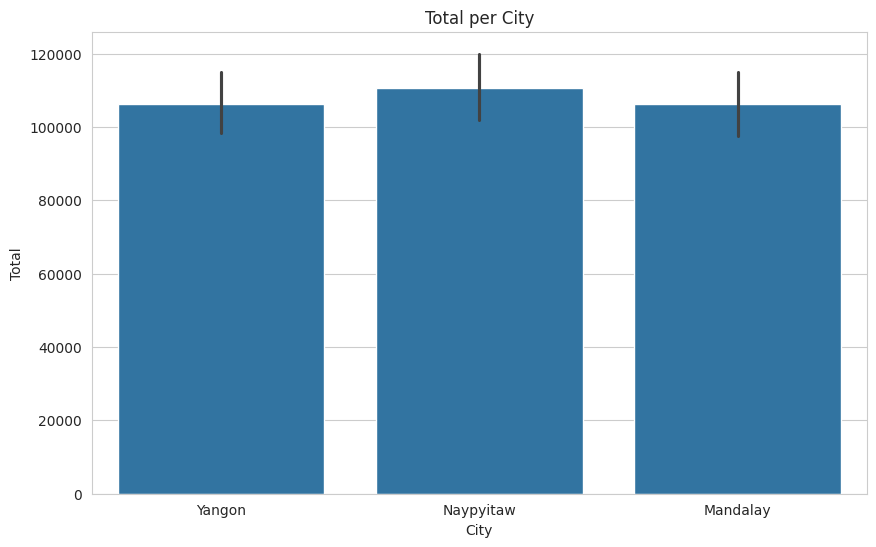

In [44]:

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='City', y='Total', estimator=sum)
plt.title('Total per City')
plt.xlabel('City')
plt.ylabel('Total')
plt.show()

## Lineplot

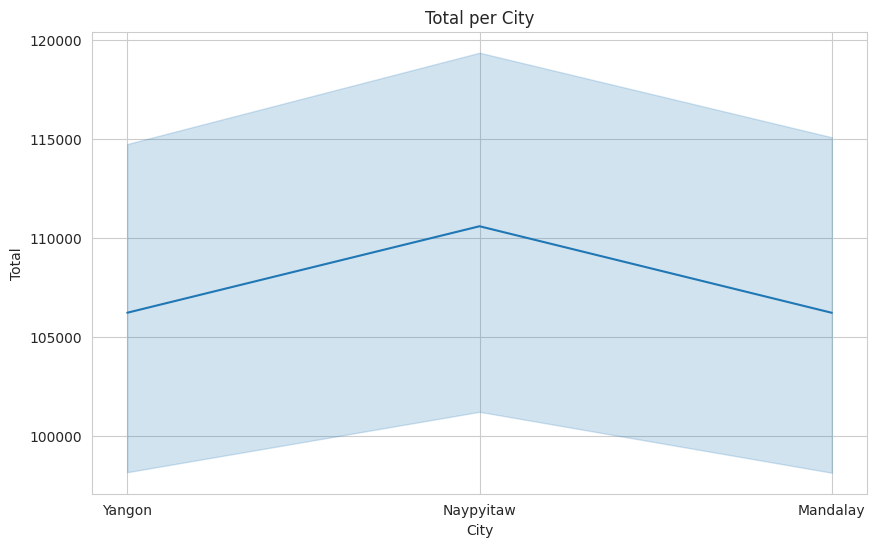

In [45]:

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='City', y='Total', estimator=sum)
plt.title('Total per City')
plt.xlabel('City')
plt.ylabel('Total')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare your data
df_plot = df_grouped.dropna()

df_plot.avg_yr1_hr_watched_per_course_bins = df_plot.avg_yr1_hr_watched_per_course_bins.astype(str)


# Set the style for better aesthetics
sns.set(style="white")

# Create the line plot using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x='avg_yr1_hr_watched_per_course_bins', y='renewal_rate', data=df_plot, marker='o', color='teal', linewidth=2)

#  Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis as percentage with no decimal points
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))

# Customize the title
plt.title('Renewal Rate by Year 1 Hours Watched per Course', fontsize=18, color='#404040', loc='left')

# Label the axes
plt.xlabel('Year 1 Hours Watched per Course', fontsize=12)
plt.ylabel('Renewal Rate', fontsize=12)

# Adjust x-axis tick labels
#plt.gca().set_xticks([0, 0.5, 1])  # Set custom tick positions if necessary
plt.gca().set_xticklabels(['(0, 0.5]', '(0.5, 1]', '(1, 1.5]',  '(1.5, 2]',  '(2, 3]',  '(3, 100]'])  # Adjust labels according to your data


# Display the plot
plt.show()


# Matplotlib

https://blog.dailydoseofds.com/p/8-elegant-alternatives-to-traditional
https://mail.google.com/mail/u/1/#inbox/FMfcgzGxTPGBfCFSKdFMHGfgHmHFPpsz
https://colab.research.google.com/drive/1biOnY9AkDl2qGT632xCUAYVCYs1DBK35?authuser=1#scrollTo=8201757f



#### Lineplot

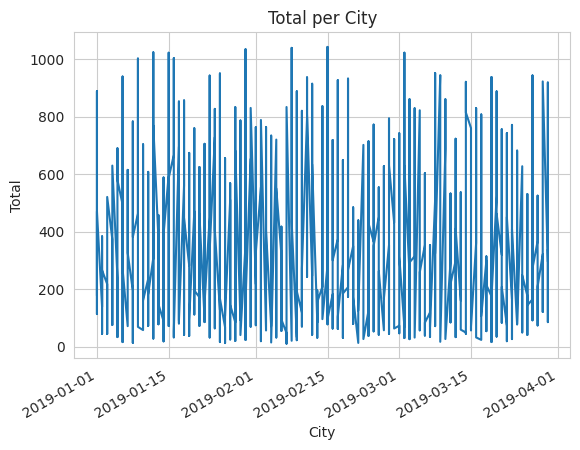

In [49]:
df.plot(x='Date', y='Total', kind='line')
plt.legend().set_visible(False)
plt.title('Total per City')
plt.xlabel('City')
plt.ylabel('Total')
plt.show()


## Boxplot + Jitterplot

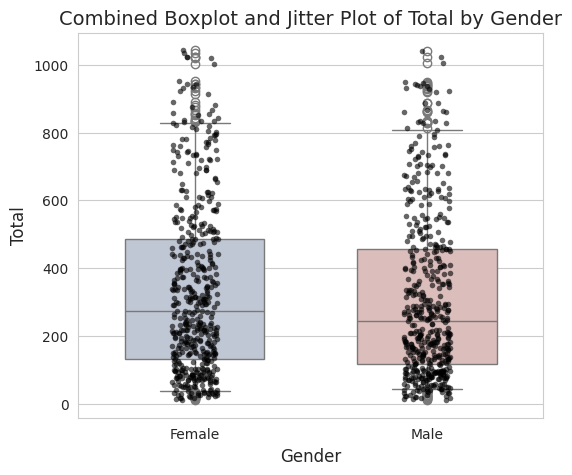

In [ ]:
# Create a combined boxplot and jitter plot
plt.figure(figsize=(6, 5))

# Create the boxplot
sns.boxplot(x='Gender', y='Total', data=df, whis=[5, 95], width=0.6, palette="vlag", hue='Gender')

# Create the jitter plot (strip plot)
sns.stripplot(x='Gender', y='Total', data=df, jitter=True, alpha=0.6, color='black', size=4)

# Adding title and labels
plt.title('Combined Boxplot and Jitter Plot of Total by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total', fontsize=12)

# Display the plot
plt.show()